# Real Estate Data Analysis – ImmoEliza

## Project Overview

The goal of this challenge is to support the real estate company *ImmoEliza* in its ambition to become the leading real estate player in Belgium. To do so, the company needs a strong pricing strategy based on data.

Before building a machine learning model, we will perform a thorough data analysis to:

- Understand the structure and content of the dataset
- Clean and prepare the data
- Extract key insights for business decision-making
- Visualize patterns and trends in the Belgian real estate market

This project is carried out as part of the `challenge-data-analysis`.

## Team Members
- [Evi]
- [Moussa]
- [Yves]

## Notebook Structure
1. Data loading and exploration  
2. Data cleaning  
3. Exploratory data analysis (EDA)  
4. Guided analysis and visual questions  
5. Interpretation and business insights  
6. Optional bonus visualizations  
7. Export and documentation  

# 1. Data loading and exploration  
- 1.1. Import Required Libraries
- 1.2. Load the Dataset
- 1.3. First Glance at the Data
  - Dataset shape
  - Column names
  - Data types
  - First rows (`.head()`)

## 1.1. Import Required Libraries

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## 1.2. Load the Dataset


In [37]:
csv_path = "../data/zimmo_real_estate_jgchoti.csv"
df = pd.read_csv(csv_path)

## 1.3. First Glance at the Data
  - Dataset shape
  - Column names
  - Data types
  - First rows (`.head()`)

In [38]:
# Display dataset shape: number of rows and columns
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Display data types
print("\nData types:")
print(df.dtypes)

# Display the first 5 rows
df.head()

Dataset shape: (25403, 18)

Column names:
['zimmo code', 'type', 'price', 'street', 'number', 'postcode', 'city', 'living area(m²)', 'ground area(m²)', 'bedroom', 'bathroom', 'garage', 'garden', 'EPC(kWh/m²)', 'renovation obligation', 'year built', 'mobiscore', 'url']

Data types:
zimmo code                object
type                      object
price                    float64
street                    object
number                    object
postcode                  object
city                      object
living area(m²)          float64
ground area(m²)          float64
bedroom                  float64
bathroom                 float64
garage                   float64
garden                      bool
EPC(kWh/m²)              float64
renovation obligation     object
year built               float64
mobiscore                float64
url                       object
dtype: object


,zimmo code,type,price,street,number,postcode,city,living area(m²),ground area(m²),bedroom,bathroom,garage,garden,EPC(kWh/m²),renovation obligation,year built,mobiscore,url
0,L97OB,Vakantiewoning (Huis),25000.0,NaN,NaN,8620,Nieuwpoort,35.0,128.0,2.0,1.0,NaN,False,NaN,False,NaN,7.0,https://www.zimmo.be/nl/nieuwpoort-8620/te-koo...
1,L9SVC,Appartement,45000.0,NaN,NaN,5570,Beauraing,62.0,NaN,2.0,1.0,NaN,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/beauraing-5570/te-koop...
2,LA02N,Rijwoning (Huis),45000.0,Oudestraat,94,9600,Ronse,NaN,232.0,2.0,1.0,NaN,False,716.0,True,1850.0,7.3,https://www.zimmo.be/nl/ronse-9600/te-koop/hui...
3,L4X2D,Vakantiewoning (Huis),40000.0,Molenheidestraat,7,3530,Helchteren,45.0,NaN,NaN,NaN,NaN,False,NaN,False,NaN,5.3,https://www.zimmo.be/nl/helchteren-3530/te-koo...
4,L9KJ7,Eengezinswoning (Huis),49900.0,Route Napoléon,10,4400,Ivoz-Ramet,123.0,8885.0,2.0,1.0,NaN,False,569.0,NaN,NaN,NaN,https://www.zimmo.be/nl/ivoz-ramet-4400/te-koo...


# 2. Data cleaning 
- 2.1. Remove Duplicates
- 2.2. Handle Missing Values
- 2.3. Clean Whitespace and Fix Formatting
- 2.4. Save Cleaned Dataset (Optional)

## 2.1. Remove Duplicates

In [39]:
print(f"Rows before duplicate removal: {len(df)}")
df = df.drop_duplicates()
print(f"Remaining rows after duplicate removal: {len(df)}")

Rows before duplicate removal: 25403
Remaining rows after duplicate removal: 25403


## 2.2. Handle Missing Values
- 2.2.1 Display Count of Missing Values per Column
- 2.2.2. Show Percentage of Missing Values
- 2.2.3. Save new dataset with missing values removed 
  - Drop columns with more than 50% missing values
  - Drop remaining rows with any missing value

### 2.2.1 Display Count of Missing Values per Column

In [40]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

Missing values per column:
 garage                   16544
ground area(m²)          10627
EPC(kWh/m²)               7936
year built                7642
renovation obligation     6128
mobiscore                 5300
number                    4721
bathroom                  4630
street                    3768
bedroom                   3116
living area(m²)           2467
dtype: int64


### 2.2.2. Show Percentage of Missing Values

In [41]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Percentage of missing values:\n", missing_percentage[missing_percentage > 0])

Percentage of missing values:
 garage                   65.126166
ground area(m²)          41.833642
EPC(kWh/m²)              31.240405
year built               30.083061
renovation obligation    24.123135
mobiscore                20.863678
number                   18.584419
bathroom                 18.226194
street                   14.832894
bedroom                  12.266268
living area(m²)           9.711451
dtype: float64


### Interpretation – Missing Values

The dataset contains several columns with significant missing values, which can impact downstream analysis and model performance.

#### Observations
- **High missingness** in `garage` (65.1%), `ground area(m<sup>2</sup>)` (41.8%), `EPC(kWh/m<sup>2</sup>)`, `year built`, and `renovation obligation` (>24%) — these require careful handling through imputation, flagging, or removal.
- **Moderate missingness** (10–25%) in `mobiscore`, `number`, `bathroom`, `street`, and `bedroom` — imputation using median/mode is typically safe.
- **Low missingness** (<10%) in `living area(m<sup>2</sup>)` — straightforward to impute using the median.

#### Column-by-Column Recommendations
| Column                 | Missing % | Recommendation |
|------------------------|------------|----------------|
| `garage`               | 65.1%      | Very high — consider dropping or creating `has_garage` binary column. |
| `ground area(m<sup>2</sup>)`      | 41.8%      | Predictive imputation (e.g. using living area, bedrooms). |
| `EPC(kWh/m<sup>2</sup>)`          | 31.2%      | Important for energy analysis — median or model-based imputation. |
| `year built`           | 30.1%      | Impute with median or infer from other features. |
| `renovation obligation`| 24.1%      | Categorical — use `"unknown"` or most frequent value. |
| `mobiscore`            | 20.8%      | Median imputation if used in analysis. |
| `number`, `street`     | ~15–18%    | Drop if not used for geolocation or model features. |
| `bathroom`, `bedroom`  | ~12–18%    | Impute with median or mode — often important for pricing. |
| `living area(m<sup>2</sup>)`      | 9.7%       | Simple median imputation. |

#### Strategic Considerations
- For **machine learning** workflows, missing data must be handled in a structured and intentional way:
  - Drop columns with high percentage of mission value when they provide little or no predictive value.
  - Create binary flags (e.g., `has_epc` columnn, `has_garage` column) to indicate whether a value is present (this helps models capture the potential signal in the absence of information.)
  - Impute missing values using robust strategies such as median, mode, or predictive modeling.

- In **dashboard/BI use cases**, represent missing data as `"N/A"` or `"unknown"` to maintain transparency.


#### Next Steps
- Visualize missingness patterns (heatmap or matrix).
- Decide per feature whether to **drop**, **impute**, or **transform**.
- Document every decision as part of the data preparation pipeline.

### 2.2.3 Visualize Missingness

Visual representations of missing values help detect patterns across the dataset:

- A **heatmap** shows missing entries row by row, which can highlight clusters or anomalies.
- A **bar plot** (via `missingno`) summarizes the missing value count per feature, sorted for easier prioritization.

These visualizations support decision-making when choosing which columns to drop, impute, or transform.


#### Approach 1 – Heatmap using seaborn

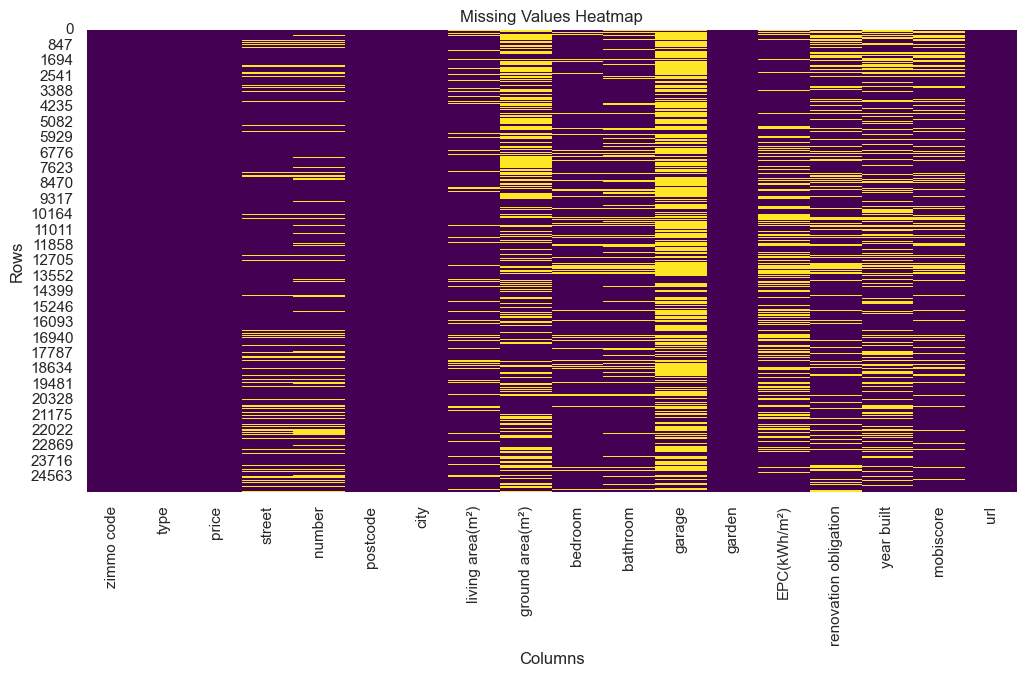

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Interpretation – Missing Values Heatmap

This heatmap provides a row-by-row visual overview of missing values across all columns:
- Yellow = Missing data  
- Purple = Valid (non-missing) data

#### Observations:
- Columns like `garage`, `ground area(m<sup>2</sup>)`, and `EPC(kWh/m<sup>2</sup>)` show **frequent and scattered missing values**, confirming their high missingness seen earlier.
- Some rows contain **multiple missing fields at once**, which may indicate poor data quality for those specific listings (e.g., older properties or incomplete entries).
- Columns such as `type`, `postcode`, `price`, and `zimmo code` are **entirely filled**, with no visible yellow — these are reliable features.
- Missing patterns appear mostly **randomly distributed** across the dataset, with no large continuous gaps, suggesting that missingness may be **MAR (Missing At Random)**.


#### Approach 2 – Visualisation with missingno 

<Axes: >

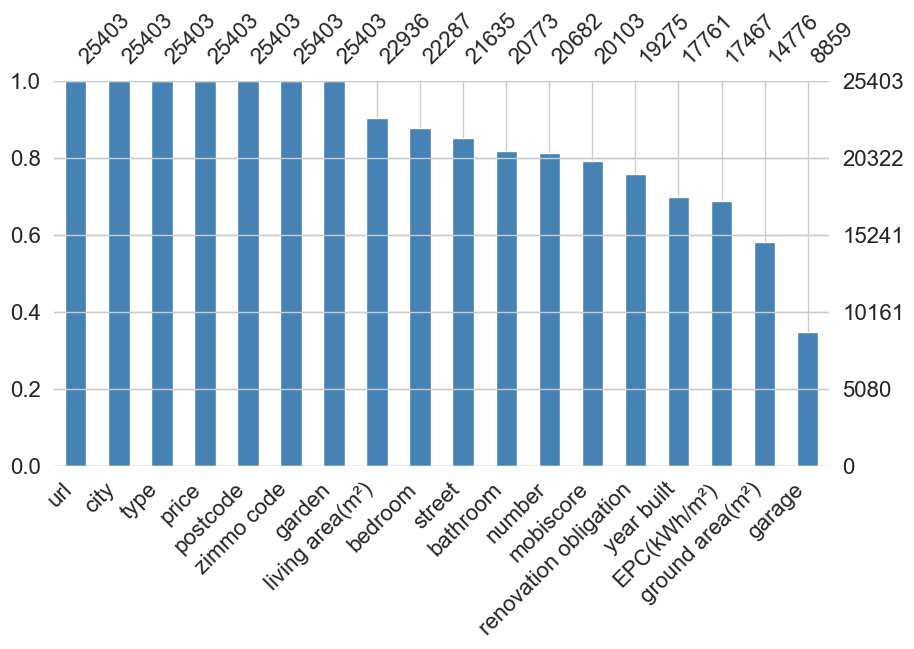

In [43]:
msno.bar(df, color="steelblue", sort="descending", figsize=(10, 5))

#### Axis Explanation

- The vertical axis (from 0 to 1) indicates the **proportion of non-missing values** in each column.
- A value of **1.0** means the column is **fully complete**, with no missing data.
- A value of **0.8** indicates that **20% of the values are missing**.

#### Key Insights:
- Columns such as `url`, `city`, `type`, `price`, `postcode`, and `zimmo code` are **fully complete** (100% of values present).
- Features like `bathroom`, `street`, `number`, `mobiscore`, `renovation obligation`, and `year built` have **moderate missingness**, ranging from ~10% to 30%.
- Columns like `EPC(kWh/m<sup>2</sup>)`, `ground area(m<sup>2</sup>)`, and especially `garage` show **high missingness**, with up to 65% of values missing in `garage`.

### Approach 3 - Matrix View

The matrix plot provides a detailed overview of the distribution and alignment of missing values across the dataset.
- Each row represents an individual observation (listing).
- Vertical white lines = missing values.
- Solid vertical bars = complete data in that column.
- A sparkline at the bottom shows data density across rows.

<Axes: >

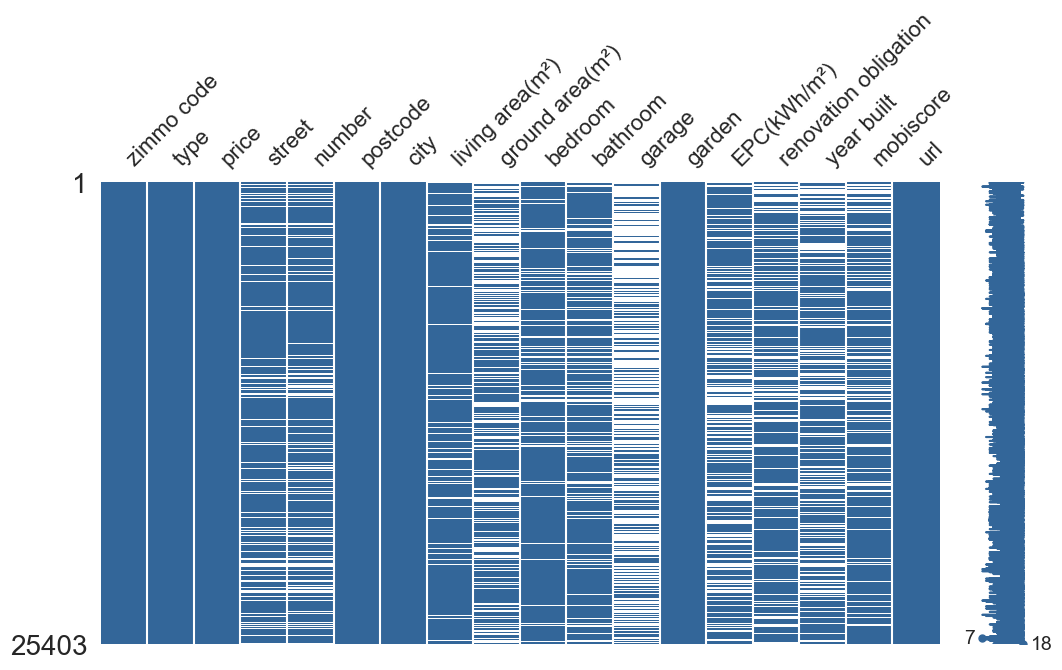

In [44]:
msno.matrix(df, figsize=(12, 6), color=(0.2, 0.4, 0.6))

### 2.2.3. Save new dataset with missing values removed 
  - A. Drop columns with more than 50% missing values
  - B. Drop remaining rows with any missing value

### Strategy by Category

#### Drop columns:
- Drop columns with **more than 50% missing values** if they are **not critical** for analysis or modeling.
- **Examples**: `garage`, `number`, `street`.

#### Impute columns:
- Use **median imputation** for numerical columns.
  - _However not applicable for_: `bathroom`, `year built`, `EPC(kWh/m<sup>2</sup>)`
- Use **regression-based imputation** when strong correlations exist between numerical features.
  - _Example_: `ground area(m<sup>2</sup>)` based on `living area(m<sup>2</sup>)`, `bedrooms`

#### Create binary flags:
- For columns with high missingness, create **binary indicator columns** to flag presence or absence of values.
  - _Examples_: `has_garage`, `has_epc`, `has_ground_area`

#### Drop rows:
- Drop rows **only if multiple critical features** are missing and the data quality is too poor to recover.

### 2.2.3. Save new dataset with missing values removed 
  - Step 1. Drop columns with more than 50% missing values
  - Step 2. Drop remaining rows with any missing value

In [45]:

# Step 1 – Drop columns with more than 50% missing values
missing_threshold = 0.5
cols_to_drop = df.columns[df.isnull().mean() > missing_threshold]

print(f"Number of columns to drop (>50% missing): {len(cols_to_drop)}")
print("Columns dropped:", list(cols_to_drop))

df_cleaned = df.drop(columns=cols_to_drop)

# Step 2 – Drop rows with any remaining missing values
before_shape = df_cleaned.shape
df_cleaned = df_cleaned.dropna()
after_shape = df_cleaned.shape

# Shape explanation
print(f"\nShape before dropping rows: {before_shape[0]} rows × {before_shape[1]} columns")
print(f"Shape after dropping rows: {after_shape[0]} rows × {after_shape[1]} columns")
print(f"Rows removed: {before_shape[0] - after_shape[0]}")
print("Cleaned dataset is now complete with no missing values.")

Number of columns to drop (>50% missing): 1
Columns dropped: ['garage']

Shape before dropping rows: 25403 rows × 17 columns
Shape after dropping rows: 5275 rows × 17 columns
Rows removed: 20128
Cleaned dataset is now complete with no missing values.


# 3. Exploratory data analysis (EDA) 
- 3.1. Variable Types: Quantitative vs Qualitative
- 3.2. Descriptive Statistics (Mean, Median, etc.)
- 3.3. Distribution Visualizations
  - Histograms
  - Boxplots
- 3.4. Correlation Matrix & Heatmap
- 3.5. Outlier Detection

## 3.1. Identify variable types in the cleaned dataset
- **Quantitative variables** are numerical and can be used in mathematical operations, plots, and statistical summaries.
- **Qualitative variables** (also called categorical) describe categories or labels and often require encoding or grouping before use in machine learning.


In [46]:
# Separate columns by dtype
quantitative_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
qualitative_cols = df_cleaned.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Quantitative variables (numerical):")
print(quantitative_cols)

print("\nQualitative variables (categorical):")
print(qualitative_cols)

Quantitative variables (numerical):
['price', 'living area(m²)', 'ground area(m²)', 'bedroom', 'bathroom', 'EPC(kWh/m²)', 'year built', 'mobiscore']

Qualitative variables (categorical):
['zimmo code', 'type', 'street', 'number', 'postcode', 'city', 'garden', 'renovation obligation', 'url']


## 3.2. Descriptive Statistics for Quantitative Variables

In [51]:
# Identify quantitative columns
quantitative_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

# Compute descriptive statistics
desc_stats = df_cleaned[quantitative_cols].describe().T

# Add median separately
desc_stats["median"] = df_cleaned[quantitative_cols].median()

# Round for readability
desc_stats = desc_stats.round(2)

# Display
display(desc_stats)

,count,mean,std,min,25%,50%,75%,max,median
price,5275.0,581147.64,480270.75,15000.0,330000.0,495000.0,669000.0,6500000.0,495000.0
living area(m²),5275.0,958.52,4863.01,20.0,160.0,210.0,300.0,143245.0,210.0
ground area(m²),5275.0,3417.55,30464.59,10.0,303.0,675.0,1405.0,1438541.0,675.0
bedroom,5275.0,3.70,1.34,1.0,3.0,3.0,4.0,24.0,3.0
bathroom,5275.0,1.49,0.86,1.0,1.0,1.0,2.0,11.0,1.0
EPC(kWh/m²),5275.0,342.13,430.62,0.0,168.0,274.0,435.0,14646.0,274.0
year built,5275.0,1964.99,53.87,143.0,1948.0,1970.0,1992.0,2026.0,1970.0
mobiscore,5275.0,7.33,1.22,3.3,6.4,7.4,8.3,9.7,7.4


### 3.3. Distribution Visualizations
  - Histograms
  - Boxplots

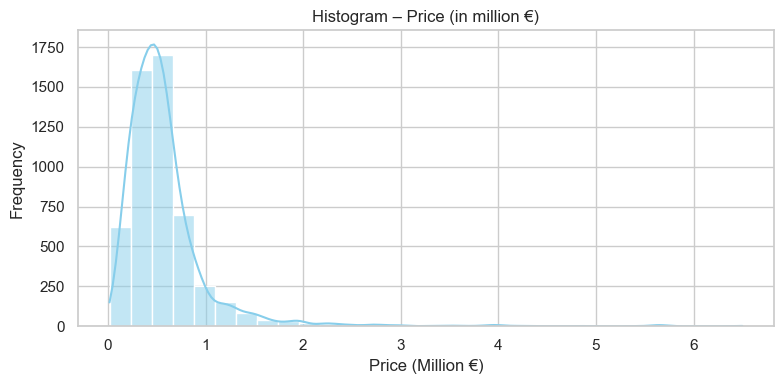

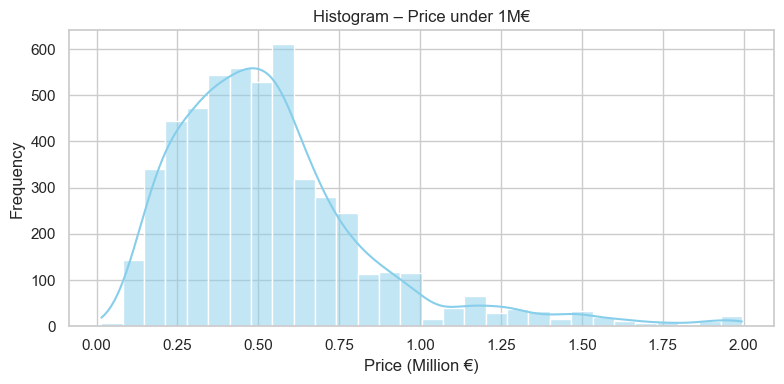

In [55]:

# Copie temporaire pour transformation
df_temp = df_cleaned.copy()

# Convert 'price' to millions of euros
df_temp["price_million"] = df_temp["price"] / 1e6

# Histogram for all prices
plt.figure(figsize=(8, 4))
sns.histplot(df_temp["price_million"], kde=True, bins=30, color="skyblue")
plt.title("Histogram – Price (in million €)")
plt.xlabel("Price (Million €)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Filter for prices < 1 million €
df_under_1m = df_temp[df_temp["price"] < 2_000_000]

# Histogram for prices < 1M€
plt.figure(figsize=(8, 4))
sns.histplot(df_under_1m["price_million"], kde=True, bins=30, color="skyblue")
plt.title("Histogram – Price under 1M€")
plt.xlabel("Price (Million €)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


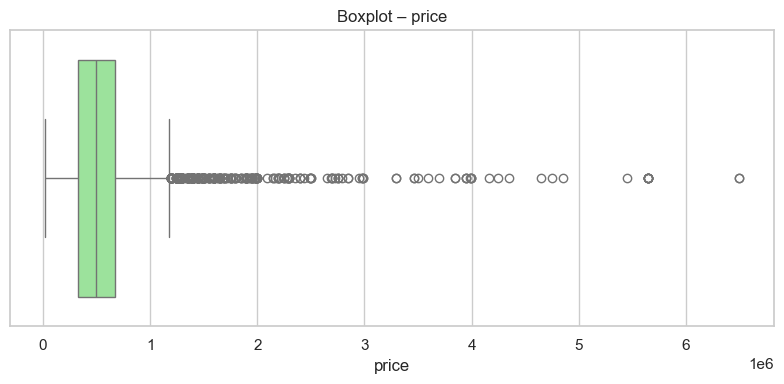

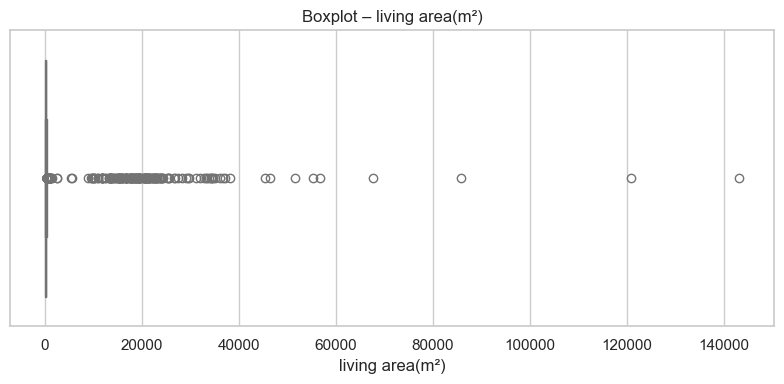

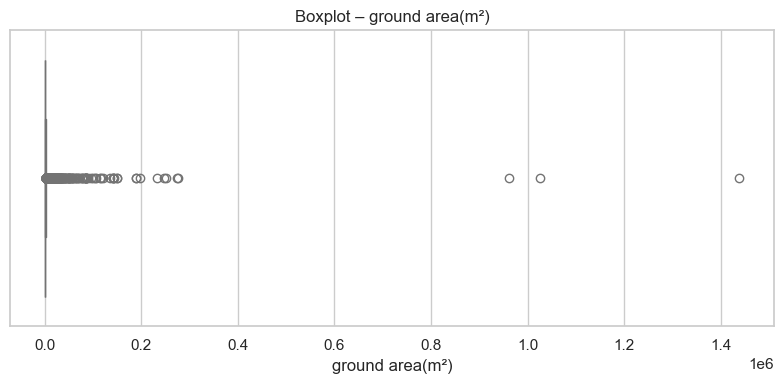

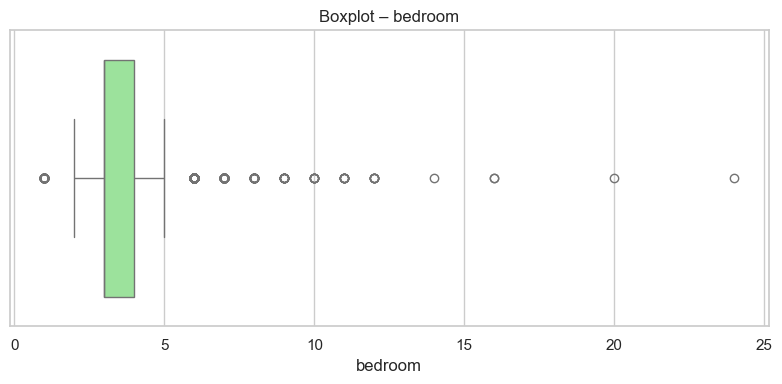

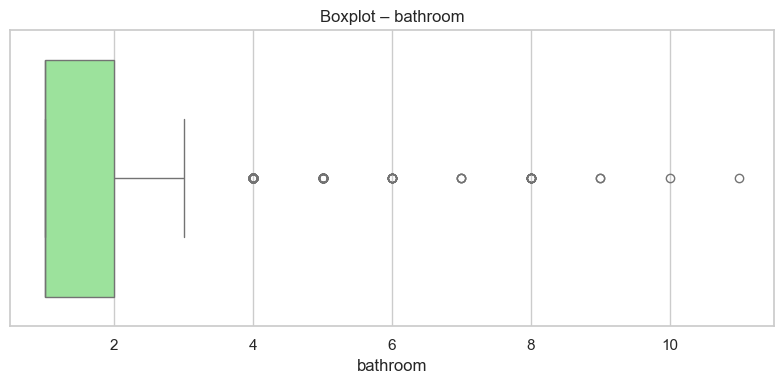

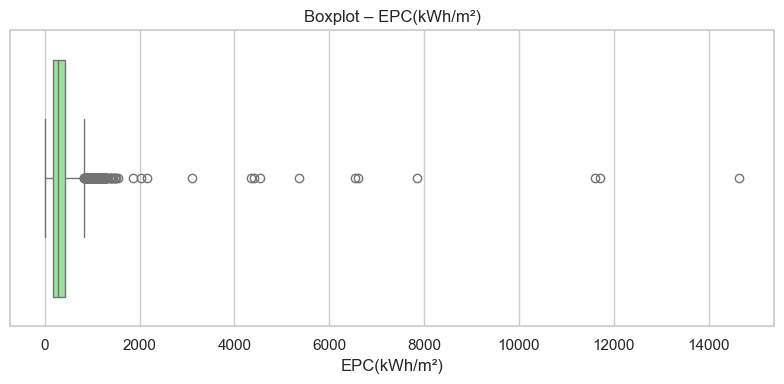

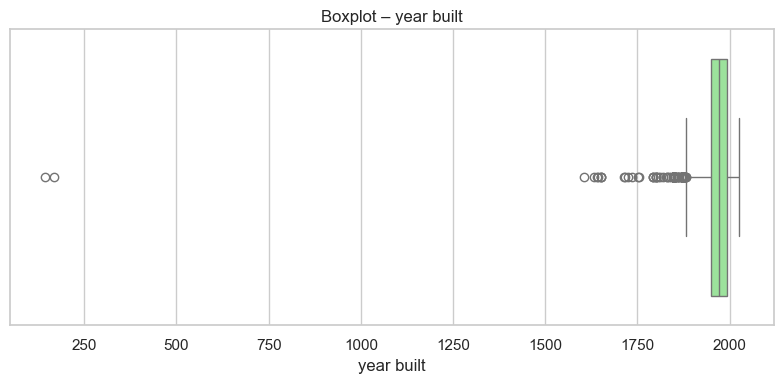

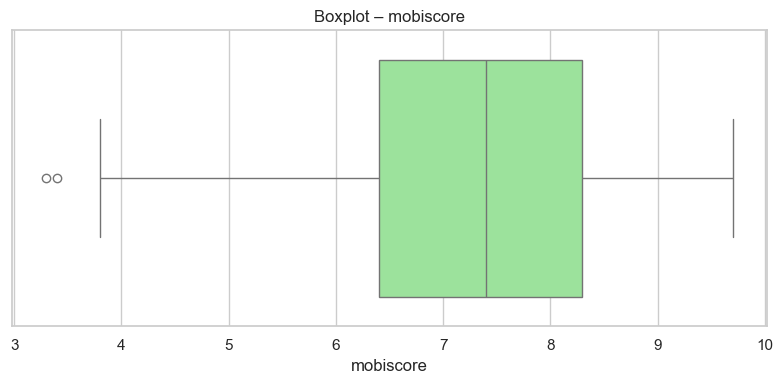

In [56]:
# Boxplots
for col in quantitative_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col], color="lightgreen")
    plt.title(f"Boxplot – {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# 4. Guided analysis and visual questions  
- 4.1. Most & Least Expensive Municipalities
  - Belgium, Wallonia, Flanders
  - Avg / Median / Price per m<sup>2</sup>
-  4.2. Most Influential Variables on Price
-  4.3. Variables with Low or No Impact
-  4.4. Histogram: Properties by Surface
-  4.5. Encoding Strategy for Categorical Variables

# 5. Interpretation and Business Insights
- 5.1. Summary of Key Findings
- 5.2. Business Recommendations for ImmoEliza
- 5.3. Data Limitations

# 6. Optional bonus visualizations 
-  6.1. Geo Mapping (price per region/municipality)
-  6.2. Trendlines or Regression Analysis
-  6.3. Clustering or Time Evolution (if available)

# 7. Export and documentation  
- 7.1. Export Final Clean Dataset
- 7.2. Save Visuals and Aggregated Tables
- 7.3. Final README Content
  - Project description
  - Installation
  - Usage
  - Visual examples
  - Team & timeline